<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/Dusty-Stellar-Sources-Classification/blob/main/Dusty_Stellar_Sources_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


The project is hosted on GitHub. Get a copy by running:

In [1]:
!git clone https://github.com/Mahdi-Abdollahii/Dusty-Stellar-Sources-Classification.git

Cloning into 'Dusty-Stellar-Sources-Classification'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (24/24), done.


# Pre

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io, requests, zipfile
from zipfile import ZipFile
import seaborn as sns

!pip install pyunpack
!pip install patool
from pyunpack import Archive

import warnings
warnings.filterwarnings('ignore')


plt.rcParams.update({'font.size': 20, 'figure.figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 5 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # Image size

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 3.1 MB/s 


> * **Save file function**

In [3]:
def savefile(df,name):
  t = df
  t.to_csv(name, header=True, index=True)
  return 0

---
# Data Preprocessing


* **SMC**

In [4]:
from astropy.io import fits

a = fits.open('/content/Dusty-Stellar-Sources-Classification/Data/J_MNRAS_451_3504_table2.dat.fits')
a[1].columns['---'].name = 'new_name1'
a[1].columns['---'].name = 'new_name2'
a[1].columns['---'].name = 'new_name3'
a[1].columns['---'].name = 'new_name4'
a[1].columns['---'].name = 'new_name5'
a[1].columns['---'].name = 'new_name6'

smc = pd.DataFrame(a[1].data)
smc['Class'].value_counts()

C-AGB                    39
STAR: dusty OB star      23
YSO-3                    22
RSG                      22
C-PN                     20
YSO-1                    14
O-AGB                    11
WR                       10
YSO-4                    10
O-EAGB                    8
YSO-2                     5
O-PN                      4
STAR                      4
RCrB                      3
C-PAGB                    3
HII                       3
OTHER: B[e] star          2
OTHER: FG O-EAGB          2
OTHER: S Star             1
O-PAGB                    1
OTHER: symbiotic star     1
BSG                       1
Name: Class, dtype: int64

In [5]:
a1 = smc.loc[smc['Class']=='O-AGB                ']
a2 = smc.loc[smc['Class']=='C-AGB                ']
a3 = smc.loc[smc['Class']=='YSO-1                ']
a4 = smc.loc[smc['Class']=='YSO-2                ']
a5 = smc.loc[smc['Class']=='YSO-3                ']
a6 = smc.loc[smc['Class']=='YSO-4                ']
a7 = smc.loc[smc['Class']=='RSG                  ']
a8 = smc.loc[smc['Class']=='O-EAGB               ']
a9 = smc.loc[smc['Class']=='O-PAGB               ']
b1 = smc.loc[smc['Class']=='C-PAGB               ']

a = pd.concat([a1,a2,a3,a4,a5,a6,a7,a8,a9,b1])
a = a.reset_index(drop=True)
a['Class'].value_counts()

a['Class'] = a['Class'].replace({'YSO-1                ':'YSO','O-EAGB               ':'OAGB',
                                 'YSO-2                ':'YSO','O-AGB                ':'OAGB',
                                 'YSO-3                ':'YSO','RSG                  ':'RSG',
                                 'YSO-4                ':'YSO','C-AGB                ':'CAGB',
                                 'O-PAGB               ':'PAGB','C-PAGB               ':'PAGB'})
SMC = a
SMC['Class'].value_counts()

YSO     51
CAGB    39
RSG     22
OAGB    19
PAGB     4
Name: Class, dtype: int64

In [6]:
x_SMC = SMC[['UMmag','BMmag','VMmag','IMmag','<Vmag>','<Imag>','Iamp','P2','J2mag',
         'H2mag','Ks2mag','JImag','HImag','KImag','IRAC1','IRAC2','IRAC3','IRAC4',
         '[24]','[70]','[160]','Tmcd']]
y_SMC = SMC['Class']

x_SMC = x_SMC.rename(columns={'UMmag':'Umag','BMmag':'Bmag','VMmag':'Vmag','IMmag':'Imag','Iamp':'IAmp',
                           'P2':'Per','JImag':'Jmag','HImag':'Hmag','KImag':'Ksmag','IRAC1':'[3.6]',
                           'IRAC2':'[4.5]','IRAC3':'[5.8]','IRAC4':'[8.0]','Tmcd':'TeffMcD'})

print(x_SMC.shape)

(135, 22)


----
* **LMC**

In [7]:
from astropy.io import fits
import pandas as pd
with fits.open('/content/Dusty-Stellar-Sources-Classification/Data/J_MNRAS_470_3250_table2.dat.fits') as data:
    lmc = pd.DataFrame(data[1].data)

lmc['SpClass'].value_counts()

     HII    155
    CAGB    152
    OAGB     89
    YSO3     81
     RSG     72
    YSO1     56
HII/YSO3     37
    STAR     31
     OPN     28
    YSO4     23
   CPAGB     19
    YSO2     16
     LBV     15
   OPAGB     14
     CPN     14
      WR     11
   RVTau     10
    B[e]      9
     GAL      8
     SNR      7
    RCrB      6
     UNK      5
     BSG      2
    Nova      1
     YSG      1
Name: SpClass, dtype: int64

In [8]:
a1 = lmc.loc[lmc['SpClass']=='    OAGB']
a2 = lmc.loc[lmc['SpClass']=='    CAGB']
a3 = lmc.loc[lmc['SpClass']=='    YSO1']
a4 = lmc.loc[lmc['SpClass']=='    YSO2']
a5 = lmc.loc[lmc['SpClass']=='    YSO3']
a6 = lmc.loc[lmc['SpClass']=='HII/YSO3']
a7 = lmc.loc[lmc['SpClass']=='    YSO4']
a8 = lmc.loc[lmc['SpClass']=='   CPAGB']
a9 = lmc.loc[lmc['SpClass']=='   OPAGB']
b1 = lmc.loc[lmc['SpClass']=='     RSG']

a = pd.concat([a1,a2,a3,a4,a5,a6,a7,a8,a9,b1])
a = a.reset_index(drop=True)
a['SpClass'].value_counts()

a['SpClass'] = a['SpClass'].replace({'    OAGB': 'OAGB','    CAGB': 'CAGB','    YSO1':'YSO',
                                     '    YSO2':'YSO','    YSO3':'YSO','   CPAGB':'PAGB',
                                     '   OPAGB':'PAGB','HII/YSO3':'YSO','    YSO4':'YSO',
                                     '     RSG':'RSG'})
LMC = a
LMC['SpClass'].value_counts()

YSO     213
CAGB    152
OAGB     89
RSG      72
PAGB     33
Name: SpClass, dtype: int64

In [9]:
x_LMC = LMC[['Umag','Bmag','Vmag','Imag','<Vmag>','<Imag>','IAmp','Per','J2mag',
         'H2mag','Ks2mag','Jmag','Hmag','Ksmag','[3.6]','[4.5]','[5.8]','[8.0]',
         '[24]','[70]','[160]','TeffMcD']]
y_LMC = LMC['SpClass']

print(x_LMC.shape)

(559, 22)


In [10]:
X = pd.concat([x_LMC,x_SMC])
X = X.reset_index(drop=True)
Y = pd.concat([y_LMC,y_SMC])
Y = Y.reset_index(drop=True)
Y = pd.DataFrame(Y)
Y.columns = ['Class']

In [11]:
X

,Umag,Bmag,Vmag,Imag,<Vmag>,<Imag>,IAmp,Per,J2mag,H2mag,...,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],[70],[160],TeffMcD
0,-99.000,18.307,16.468,13.943,16.623,13.985,0.057,100.76,12.408,11.488,...,-99.00,-99.000,10.9099,10.8052,10.6874,10.5041,9.6408,-99.000,-99.000,3156.0
1,13.433,13.584,13.266,12.528,-99.000,-99.000,-99.000,-99.00,12.181,11.781,...,11.66,11.100,10.0871,9.6048,9.2248,8.5769,7.2094,-99.000,-99.000,5555.0
2,-99.000,21.311,19.536,17.339,18.959,16.259,1.228,883.70,15.052,13.779,...,12.79,12.180,11.1326,10.6102,10.0316,9.2020,7.2266,-99.000,-99.000,2673.0
3,19.691,18.868,16.725,13.571,-99.000,-99.000,-99.000,-99.00,12.263,11.307,...,11.34,11.010,10.7319,10.7726,10.5911,10.5096,-99.0000,-99.000,-99.000,3145.0
4,17.707,16.211,14.628,13.123,-99.000,-99.000,-99.000,-99.00,12.416,11.740,...,11.53,11.210,10.5316,10.4196,10.0697,9.4969,7.1893,-99.000,-99.000,3644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,19.243,17.556,15.127,12.562,15.066,12.513,0.327,383.00,10.864,10.023,...,10.08,99.999,9.4930,9.5620,9.4160,9.3020,9.0010,99.999,99.999,2825.0
690,13.820,13.929,13.999,13.620,99.999,99.999,99.999,0.00,13.067,12.591,...,12.60,11.800,9.9690,9.2040,8.5990,7.5370,5.2790,99.999,99.999,0.0
691,99.999,99.999,99.999,99.999,99.999,99.999,99.999,0.00,17.340,15.458,...,15.80,13.950,10.5710,9.4770,8.5140,7.5210,5.0410,99.999,99.999,0.0
692,15.435,15.816,15.439,15.093,99.999,99.999,99.999,0.00,14.726,14.649,...,14.60,14.410,13.5580,12.9380,10.6140,8.1270,4.9120,99.999,99.999,0.0


(array([108.,   0., 191.,   0.,   0., 264.,   0.,  37.,   0.,  94.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

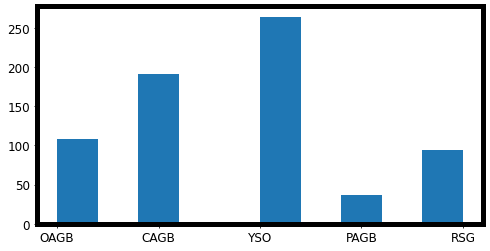

In [12]:
plt.hist(Y['Class'])

In [13]:
from sklearn import preprocessing

LE = preprocessing.LabelEncoder()
EY = LE.fit_transform(Y)
EY = pd.DataFrame(EY)
EY.columns = ['EY']

print('Ordinal Encoding:')
LE.inverse_transform(np.arange(0,5))

Ordinal Encoding:


array(['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'], dtype=object)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X , EY , test_size=0.1 , random_state = 1234 )

In [15]:
np.array(X_test)[0]

array([  14.623,   14.614,   13.286,   99.999,   99.999,   99.999,
         99.999,    0.   ,   10.44 ,    9.6  ,    9.383,   10.43 ,
         99.999,   99.999,    9.253,    9.394,    9.252,    9.176,
          8.943,   99.999,   99.999, 3575.   ])

In [16]:
np.array(X_test)[5]

array([  16.403 ,   14.455 ,   12.971 ,   10.886 ,  -99.    ,  -99.    ,
        -99.    ,  -99.    ,    8.942 ,    8.206 ,    7.837 ,  -99.    ,
        -99.    ,  -99.    ,    7.3639,    7.429 ,    7.153 ,    6.6453,
          4.3231,  -99.    ,  -99.    , 3271.    ])

In [ ]:
np.array(X_test)[20]

array([17.684, 18.145, 19.728, 16.185, 99.999, 99.999, 99.999,  0.   ,
       15.363, 14.959, 14.154, 15.43 , 15.   , 14.29 , 12.527, 11.612,
       10.541,  8.447,  4.055,  0.826, -1.087,  0.   ])

In [ ]:
np.array(X_test)[30]

array([ -99.    ,  -99.    ,  -99.    ,  -99.    ,  -99.    ,  -99.    ,
        -99.    ,  -99.    ,    9.08  ,    8.329 ,    7.983 ,  -99.    ,
        -99.    ,  -99.    ,    7.8596,    7.7518,    7.4739,    6.911 ,
          4.3186,  -99.    ,  -99.    , 2673.    ])

In [17]:
X.replace([np.inf, -np.inf, -99, 99.999], np.nan, inplace=True)

In [21]:
X.shape[0]*X.shape[1]

15268

In [18]:
np.count_nonzero(np.isnan(X))

6001

In [22]:
np.count_nonzero(np.isnan(X))/(X.shape[0]*X.shape[1])

0.3930442756091171

In [29]:
np.array(X).shape[0]

694

In [41]:
list_row_nan = []
X_array = np.array(X)
for i in range(0,X_array.shape[0]):
  list_row_nan.append(np.count_nonzero(np.isnan(X_array[i])))

(array([ 1., 22., 61., 42., 33., 51., 77., 63., 61., 69.,  0., 45., 46.,
        33., 36., 22., 19.,  6.,  2.,  2.,  1.,  2.]),
 array([ 1.        ,  1.90909091,  2.81818182,  3.72727273,  4.63636364,
         5.54545455,  6.45454545,  7.36363636,  8.27272727,  9.18181818,
        10.09090909, 11.        , 11.90909091, 12.81818182, 13.72727273,
        14.63636364, 15.54545455, 16.45454545, 17.36363636, 18.27272727,
        19.18181818, 20.09090909, 21.        ]),
 <a list of 22 Patch objects>)

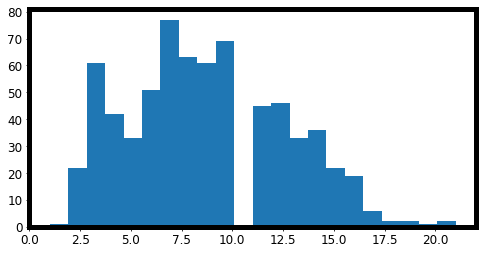

In [43]:
plt.hist(list_row_nan,22)

In [50]:
list_col_nan = []
X_col_array = np.array(X).reshape(X.shape[1],X.shape[0])
for i in range(0,X_col_array.shape[0]):
  list_col_nan.append(np.count_nonzero(np.isnan(X_col_array[i])))

(array([3., 1., 0., 3., 1., 3., 3., 2., 4., 2.]),
 array([132. , 156.9, 181.8, 206.7, 231.6, 256.5, 281.4, 306.3, 331.2,
        356.1, 381. ]),
 <a list of 10 Patch objects>)

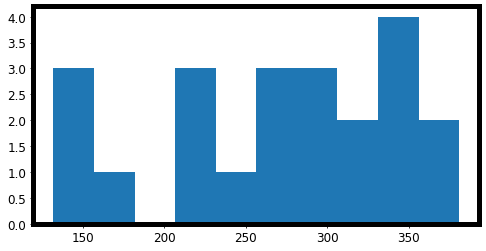

In [51]:
plt.hist(list_col_nan)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

X.replace([np.inf, -np.inf, -99, 99.999], np.nan, inplace=True)
imp = IterativeImputer()
imp_data = imp.fit_transform(X)
X = pd.DataFrame(imp_data, columns= X.columns)

In [ ]:
Data = pd.concat([X,Y,EY], axis=1)

from sklearn.utils import shuffle
Data = shuffle(Data, random_state=42)
Data = Data.reset_index(drop=True)

Data.head()

In [ ]:
Data['Class'].value_counts()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

r_scaler = RobustScaler()
X_rbst = r_scaler.fit_transform(X)
X_rbst = pd.DataFrame(X_rbst, columns= X.columns)

s_scaler = StandardScaler()
X_std = s_scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns= X.columns)

mm_scaler = MinMaxScaler()
X_mm = mm_scaler.fit_transform(X)
X_mm = pd.DataFrame(X_mm, columns= X.columns)

In [ ]:
from sklearn.decomposition import PCA

t = X
pca = PCA()
t = pca.fit_transform(t)
PX = pd.DataFrame(t)   

t = X_rbst
rpca = PCA()
t = rpca.fit_transform(t)
PRX = pd.DataFrame(t) 

t = X_mm
mpca = PCA()
t = mpca.fit_transform(t)
PMX = pd.DataFrame(t)   

t = X_std
spca = PCA()
t = spca.fit_transform(t)
PSX = pd.DataFrame(t)

---
# **Fitting Models**

# Necessary Functions

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

def clf_reports(x,y,clf,normalize=None):

  x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
  clf.fit(x_train, y_train)
  #clf.score(x_test,y_test)
  tn = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO']

  y_pred = clf.predict(x_test)
  print(classification_report(y_test, y_pred, target_names=tn),'\n')

  fig, ax = plt.subplots(figsize=(8, 8))
  plot_confusion_matrix(clf, x_test, y_test,  ax=ax, display_labels=tn, normalize=normalize)
  
  return

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def LearningCurve(X,EY,clf):
  
  plt.figure(figsize=(10, 6), dpi=80)
  plt.title('Learning Curve')
  plt.xlabel("Training samples")
  plt.ylabel("Score")
  
  cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
  train_sizes = np.linspace(0.05, 1, 15)

  train_sizes, train_scores, test_scores = learning_curve(
      clf, X, EY, cv=cv, n_jobs=-1, train_sizes=train_sizes)

  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  plt.grid()

  plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,color="r")
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
  plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

  plt.legend(loc="best")
  
  return

In [ ]:
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

def ValidationCurve(estimator, X, Y, param_range, param_name, 
                          cv=None, Modelname='', n_jobs=None, xlog=False):
  

  clf = estimator

  train_scores, test_scores = validation_curve(
      clf, X, Y, cv=cv, n_jobs=n_jobs, 
      param_name=param_name, param_range=param_range)
  
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  plt.figure(figsize=(8, 6), dpi=80)
  #plt.title(f"Validation Curve with {Modelname}")
  plt.xlabel(f"{param_name}")
  plt.ylabel("Score")
  plt.ylim(0.0, 1.1)
  lw = 2
  
  if (xlog):
    plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
  else:
    plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)



  plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
  plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
  plt.legend(loc="best")
  plt.grid()
  
  return plt

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

clf = KNeighborsClassifier(n_jobs=-1)

weight_options = ['uniform', 'distance']
algorithm = ['ball_tree','kd_tree','brute']
metric = ['minkowski','euclidean','manhattan']
p = [1,2]
hyperparameters = dict(algorithm=algorithm ,weights=weight_options,
                       metric=metric, p=p)

clf0 = GridSearchCV(clf, hyperparameters, cv=10, scoring='f1_micro', n_jobs=-1)
clf0.fit(X,EY)
clf1 = GridSearchCV(clf, hyperparameters, cv=10, scoring='f1_micro', n_jobs=-1)
clf1.fit(X_std,EY)
clf2 = GridSearchCV(clf, hyperparameters, cv=10, scoring='f1_micro', n_jobs=-1)
clf2.fit(X_mm,EY)
clf3 = GridSearchCV(clf, hyperparameters, cv=10, scoring='f1_micro', n_jobs=-1)
clf3.fit(X_rbst,EY)

print(f'X best score: {clf0.best_score_}, Best parameters: {clf0.best_params_}')
print(f'X_std best score: {clf1.best_score_}, Best parameters: {clf1.best_params_}')
print(f'X_MinMax best score: {clf2.best_score_}, Best parameters: {clf2.best_params_}')
print(f'X_Robust best score: {clf3.best_score_}, Best parameters: {clf3.best_params_}')

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(algorithm='ball_tree',weights='distance',
                           metric='minkowski', p=2)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
pr = np.arange(1,7)
ValidationCurve(clf, X_std, EY, pr, 'n_neighbors',
                cv=cv, Modelname='KNN', n_jobs=-1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(algorithm='ball_tree',weights='distance',
                           metric='minkowski', p=2)
clf_reports(X_std,EY,clf)
LearningCurve(X_std,EY,clf)

# DTC

In [ ]:
from pandas.core.common import random_state
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier as DTC

clf = DTC()

criterion = ['gini', 'entropy']
splitter = ['best','random']
max_features = ['auto','sqrt','log2',None]
mss = np.arange(1,8)
msl = np.arange(1,8)
weights = [{0:1000/191,1:1000/108,2:1000/37,3:1000/94,4:1000/264},'balanced',None]

hyperparameters = dict(criterion=criterion ,splitter=splitter,
                       class_weight=weights, min_samples_leaf=msl,
                       min_samples_split = mss, max_features=max_features)


clf0 = GridSearchCV(clf, hyperparameters, cv=10, scoring='f1_micro', n_jobs=-1)
clf0.fit(X,EY)
clf1 = GridSearchCV(clf, hyperparameters, cv=10, scoring='f1_micro', n_jobs=-1)
clf1.fit(X_std,EY)
clf2 = GridSearchCV(clf, hyperparameters, cv=10, scoring='f1_micro', n_jobs=-1)
clf2.fit(X_mm,EY)
clf3 = GridSearchCV(clf, hyperparameters, cv=10, scoring='f1_micro', n_jobs=-1)
clf3.fit(X_rbst,EY)

print(f'X best score: {clf0.best_score_}, Best parameters: {clf0.best_params_}')
print(f'X_std best score: {clf1.best_score_}, Best parameters: {clf1.best_params_}')
print(f'X_MinMax best score: {clf2.best_score_}, Best parameters: {clf2.best_params_}')
print(f'X_Robust best score: {clf3.best_score_}, Best parameters: {clf3.best_params_}')

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier as DTC

weights = {0:1000/191,1:1000/108,2:1000/37,3:1000/94,4:1000/264}
clf = DTC(criterion='entropy' ,splitter='best',
          max_features=None, min_samples_split=2,
          class_weight=weights, min_samples_leaf=3)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
pr = np.linspace(1, 20, 20, endpoint=True)
ValidationCurve(clf, X_rbst, EY, pr, 'max_depth',
                cv=cv, Modelname='DecisionTreeClassifier', n_jobs=-1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC

weights = {0:1000/191,1:1000/108,2:1000/37,3:1000/94,4:1000/264}
clf = DTC(criterion='entropy' ,splitter='best', max_depth=15,
          max_features=None, min_samples_split=2, random_state=42,
          class_weight=weights, min_samples_leaf=3)

clf_reports(X_rbst,EY,clf)
LearningCurve(X_rbst,EY,clf)

# LDA

In [ ]:
from pandas.core.common import random_state
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

clf = LDA()

solver = ['svd','lsqr','eigen']
shrinkage = ['auto',None,np.arange(0,1,0.01)]
n_components = [2,5,10,15,20,25,30,None]

hyperparameters = dict(solver=solver, shrinkage=shrinkage,
                       n_components=n_components)


clf0 = GridSearchCV(clf, hyperparameters, cv=10, scoring='f1_micro', n_jobs=-1)
clf0.fit(X,EY)
clf1 = GridSearchCV(clf, hyperparameters, cv=10, scoring='f1_micro', n_jobs=-1)
clf1.fit(X_std,EY)
clf2 = GridSearchCV(clf, hyperparameters, cv=10, scoring='f1_micro', n_jobs=-1)
clf2.fit(X_mm,EY)
clf3 = GridSearchCV(clf, hyperparameters, cv=10, scoring='f1_micro', n_jobs=-1)
clf3.fit(X_rbst,EY)

print(f'X best score: {clf0.best_score_}, Best parameters: {clf0.best_params_}')
print(f'X_std best score: {clf1.best_score_}, Best parameters: {clf1.best_params_}')
print(f'X_MinMax best score: {clf2.best_score_}, Best parameters: {clf2.best_params_}')
print(f'X_Robust best score: {clf3.best_score_}, Best parameters: {clf3.best_params_}')

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

clf = LDA(solver='eigen',shrinkage=None,n_components=2)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
pr = np.logspace(-20, 2, num=50, endpoint=True)
ValidationCurve(clf, X_mm, EY, pr, 'tol', xlog=True,
                cv=cv, Modelname='LDA', n_jobs=-1)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

clf = LDA(solver='eigen',shrinkage=None,n_components=2)
clf_reports(X_mm,EY,clf)
LearningCurve(X_mm,EY,clf)

# Gaussian Naive Bayes

In [ ]:
from pandas.core.common import random_state
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

var_smoothing = np.logspace(1,-10, num=100)
hyperparameters = dict(var_smoothing=var_smoothing)


clf0 = GridSearchCV(clf, hyperparameters, cv=10, scoring='f1_micro', n_jobs=-1)
clf0.fit(X,EY)
clf1 = GridSearchCV(clf, hyperparameters, cv=10, scoring='f1_micro', n_jobs=-1)
clf1.fit(X_std,EY)
clf2 = GridSearchCV(clf, hyperparameters, cv=10, scoring='f1_micro', n_jobs=-1)
clf2.fit(X_mm,EY)
clf3 = GridSearchCV(clf, hyperparameters, cv=10, scoring='f1_micro', n_jobs=-1)
clf3.fit(X_rbst,EY)

print(f'X best score: {clf0.best_score_}, Best parameters: {clf0.best_params_}')
print(f'X_std best score: {clf1.best_score_}, Best parameters: {clf1.best_params_}')
print(f'X_MinMax best score: {clf2.best_score_}, Best parameters: {clf2.best_params_}')
print(f'X_Robust best score: {clf3.best_score_}, Best parameters: {clf3.best_params_}')

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB(var_smoothing=0.0774263682681127)

clf_reports(X_std,EY,clf)
LearningCurve(X_std,EY,clf)

# SGD

In [ ]:
from pandas.core.common import random_state
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()

n_jobs = [-1]
loss = ['hinge','log_loss','log','modified_huber','squared_hinge','perceptron',
        'squared_error','huber','epsilon_insensitive','squared_epsilon_insensitive']
penalty = ['l2','l1','elasticnet']
shuffle = [True,False]
average = [True,False]
class_weight = [{0:1000/191,1:1000/108,2:1000/37,3:1000/94,4:1000/264},
                'balanced',None]
tol = np.logspace(-5,0.5, num=6)
learning_rate = ['constant','optimal','invscaling','adaptive']
power_t = np.linspace(-10,10, num=20)
l1_ratio = np.logspace(-4,0, num=10)
max_iter = np.logspace(1,5, num=10)
epsilon = np.linspace(0.01,1.5, num=15)

hyperparameters = dict(n_jobs=n_jobs,loss=loss,penalty=penalty,shuffle=shuffle,
                       average=average,class_weight=class_weight,tol=tol,
                       learning_rate=learning_rate,power_t=power_t,l1_ratio=l1_ratio,
                       max_iter=max_iter,epsilon=epsilon)

clf0 = RandomizedSearchCV(clf, hyperparameters, cv=10, scoring='f1_micro', n_jobs=-1)
clf0.fit(X,EY)
clf1 = RandomizedSearchCV(clf, hyperparameters, cv=10, scoring='f1_micro', n_jobs=-1)
clf1.fit(X_std,EY)
clf2 = RandomizedSearchCV(clf, hyperparameters, cv=10, scoring='f1_micro', n_jobs=-1)
clf2.fit(X_mm,EY)
clf3 = RandomizedSearchCV(clf, hyperparameters, cv=10, scoring='f1_micro', n_jobs=-1)
clf3.fit(X_rbst,EY)


print(f'X best score: {clf0.best_score_}, Best parameters: {clf0.best_params_}')
print(f'X_std best score: {clf1.best_score_}, Best parameters: {clf1.best_params_}')
print(f'X_MinMax best score: {clf2.best_score_}, Best parameters: {clf2.best_params_}')
print(f'X_Robust best score: {clf3.best_score_}, Best parameters: {clf3.best_params_}')

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import ShuffleSplit

clf = SGDClassifier(tol=0.001584893192461114,shuffle=False,loss='log',
                    penalty='l2',n_jobs=-1,max_iter=77,power_t=-2.6315789473684212,
                    learning_rate='optimal',l1_ratio=0.000774263682681127,
                    epsilon=0.01,class_weight=None,average=True)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
pr = np.logspace(-7,3, num=75)
ValidationCurve(clf, X_std, EY, pr, 'alpha', xlog = True,
                cv=cv, Modelname='SGD Classifier', n_jobs=-1)

In [ ]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(tol=0.001584893192461114,shuffle=False,loss='log',alpha=1e-6,
                    penalty='l2',n_jobs=-1,max_iter=77,power_t=-2.6315789473684212,
                    learning_rate='optimal',l1_ratio=0.000774263682681127,
                    epsilon=0.01,class_weight=None,average=True)

clf_reports(X_std,EY,clf)
LearningCurve(X_std,EY,clf)

# SVC

In [ ]:
from pandas.core.common import random_state
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

clf = SVC()

kernel = ['linear','poly','rbf','sigmoid']
degree = [1,2,3,4,5]
shrinking = [True,False]
gamma = ['scale','auto']
probability = [True,False]
class_weight = [{0:1000/191,1:1000/108,2:1000/37,3:1000/94,4:1000/264},
                'balanced',None]
tol = np.logspace(-5,0.5, num=6)
decision_function_shape = ['ovo','ovr']
break_ties = [True,False]
C = [0.1,1,10,100]

hyperparameters = dict(kernel=kernel,degree=degree,shrinking=shrinking,gamma=gamma,
                       probability=probability,class_weight=class_weight,tol=tol, C=C,
                       decision_function_shape=decision_function_shape,break_ties=break_ties)


clf0 = RandomizedSearchCV(clf, hyperparameters, cv=10, scoring='f1_micro', n_jobs=-1)
clf0.fit(X,EY)
clf1 = RandomizedSearchCV(clf, hyperparameters, cv=10, scoring='f1_micro', n_jobs=-1)
clf1.fit(X_std,EY)
clf2 = RandomizedSearchCV(clf, hyperparameters, cv=10, scoring='f1_micro', n_jobs=-1)
clf2.fit(X_mm,EY)
clf3 = RandomizedSearchCV(clf, hyperparameters, cv=10, scoring='f1_micro', n_jobs=-1)
clf3.fit(X_rbst,EY)

print(f'X best score: {clf0.best_score_}, Best parameters: {clf0.best_params_}')
print(f'X_std best score: {clf1.best_score_}, Best parameters: {clf1.best_params_}')
print(f'X_MinMax best score: {clf2.best_score_}, Best parameters: {clf2.best_params_}')
print(f'X_Robust best score: {clf3.best_score_}, Best parameters: {clf3.best_params_}')

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit

clf = SVC(tol=0.00012589254117941674, shrinking=False, probability=True,
          kernel='rbf', gamma='auto', degree=4, decision_function_shape='ovr',
          class_weight=None, break_ties=False)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
pr = np.logspace(-5,6, num=30)
ValidationCurve(clf, X_std, EY, pr, 'C', xlog = True,
                cv=cv, Modelname='SVC', n_jobs=-1)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit

clf = SVC(tol=0.00012589254117941674, shrinking=False, probability=True,
          kernel='rbf', degree=4, decision_function_shape='ovr',
          class_weight=None, break_ties=False, C=100)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
pr = np.logspace(-6,2, num=50)
ValidationCurve(clf, X_std, EY, pr, 'gamma', xlog = True,
                cv=cv, Modelname='SVC', n_jobs=-1)

In [ ]:
from sklearn.svm import SVC

clf = SVC(tol=0.00012589254117941674, shrinking=False, probability=True,
          kernel='rbf', gamma=0.1, degree=4, decision_function_shape='ovr',
          class_weight=None, break_ties=False, C=100)

clf_reports(X_std,EY,clf)
LearningCurve(X_std,EY,clf)

---
# **Data Augmentation**



# Augmentation

In [ ]:
SData = pd.concat([X_std,EY],axis=1)
y = SData.pop('EY')

# from sklearn.model_selection import train_test_split
def train_test_eq_split(X, y, n_per_class, random_state=None):
    if random_state:
        np.random.seed(random_state)
    sampled = X.groupby(y, sort=False).apply(
        lambda frame: frame.sample(n_per_class))
    mask = sampled.index.get_level_values(1)

    X_train = X.drop(mask)
    X_test = X.loc[mask]
    y_train = y.drop(mask)
    y_test = y.loc[mask]

    return X_train, X_test, y_train, y_test

# x_train,x_test, y_train, y_test= train_test_split(X_std, EY, test_size=0.5, random_state=42)
x_train,x_test, y_train, y_test= train_test_eq_split(SData, y, n_per_class=10, random_state=42)

In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE 
from IPython.display import clear_output
clear_output(wait=True)

sm = SMOTE(n_jobs=-1)
AX, AY = sm.fit_resample(x_train, y_train)

from IPython.display import clear_output
clear_output(wait=True)
print(f'Value Counts:\n{AY.value_counts()}')

In [ ]:
def learning_curve2(clf):
  s = []
  ts = np.arange(5,30)
  for i in ts:
    x_train,x_test,y_train,y_test= train_test_eq_split(SData, y, n_per_class=i, random_state=42)
    sm = SMOTE(n_jobs=-1)
    AX, AY = sm.fit_resample(x_train, y_train)
    clf.fit(AX, AY)
    s.append(clf.score(x_test,y_test))  
    
  fig, ax = plt.subplots(figsize=(10, 5))
  plt.title('Learning Curve')
  plt.xlabel("Test samples")
  plt.ylabel("Score")
  plt.rc('lines', linewidth = 2)
  plt.grid()
  plt.plot(ts, s, 'o-', color="b", label="Score")
  plt.legend(loc="best")

  return

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

def clf_reports2(clf,n_per_class,normalize=None):

  x_train,x_test,y_train,y_test= train_test_eq_split(SData, y, n_per_class=n_per_class, random_state=42)
  sm = SMOTE(n_jobs=-1)
  AX, AY = sm.fit_resample(x_train, y_train)
   
  clf.fit(AX, AY)
  y_pred = clf.predict(x_test)
  tn = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO']
  print(classification_report(y_test, y_pred, target_names=tn),'\n')
   
  fig, ax = plt.subplots(figsize=(8, 8))
  plot_confusion_matrix(clf, x_test, y_test,  ax=ax, display_labels=tn, normalize=normalize)
  
  return

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
learning_curve2(KNeighborsClassifier())

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_reports2(KNeighborsClassifier(),5)

# DTC

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
learning_curve2(DTC())

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
clf_reports2(DTC(),10)

# LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
learning_curve2(LDA())

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
clf_reports2(LDA(),11)

# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
learning_curve2(GaussianNB())

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_reports2(GaussianNB(),10)

# SGD

In [ ]:
from sklearn.linear_model import SGDClassifier
learning_curve2(SGDClassifier())

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.linear_model import SGDClassifier
clf_reports2(SGDClassifier(),18)

# SVC

In [ ]:
from sklearn.svm import SVC
learning_curve2(SVC())

In [ ]:
from sklearn.svm import SVC
clf_reports2(SVC(),10)

In [ ]:
from sklearn.svm import SVC
clf_reports2(SVC(),16)

---
# Comparison

In [ ]:
plt.figure(figsize=(12, 6), dpi=80)
plt.rc('lines',linewidth=2)
plt.rc('lines',markersize=7)
plt.rc('lines',markersize=7)

plt.title('Classifiers\' average f1-Score improvement over Augmentation')

plt.ylabel("Score(%)")
  
models = ['KNN','DTC','LDA','GaussianNB','SGD','SVC']
aba = [79,80,86,77,87,88]
aaa = [96,92,91,81,91,90]

plt.plot(models, aba, 'o--', color="c", markerfacecolor='b',
         label="Before Augmentation")
plt.plot(models, aaa, 'o--', color="y", markerfacecolor='r',
         label="After Augmentation")

plt.legend(loc="best")
plt.grid()

In [ ]:
plt.figure(figsize=(12, 6), dpi=80)
plt.rc('lines',linewidth=2)
plt.rc('lines',markersize=7)
plt.rc('lines',markersize=7)

plt.title('Classifiers\' Accuracy improvement over Augmentation')

plt.ylabel("Score(%)")
  
models = ['KNN','DTC','LDA','GaussianNB','SGD','SVC']
aba = [86,86,89,81,90,90]
aaa = [96,92,91,82,91,90]

plt.plot(models, aba, 'o--', color="c", markerfacecolor='b',
         label="Before Augmentation")
plt.plot(models, aaa, 'o--', color="y", markerfacecolor='r',
         label="After Augmentation")

plt.legend(loc="best")
plt.grid()